MODULE 1: DATA COLLECTION

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("./dataset/FWI Dataset.csv")

In [28]:
#Looking into the data
print(df.head())

   day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29   57   18    0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29   61   13    1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26   82   22   13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25   89   13    2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27   77   16    0.0  64.8  3.0  14.2  1.2  3.9   

   FWI    Classes    Region  
0  0.5  not fire     Bejaia  
1  0.4  not fire     Bejaia  
2  0.1  not fire     Bejaia  
3    0  not fire     Bejaia  
4  0.5  not fire     Bejaia  


In [29]:
print(df.shape)

(244, 15)


In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB
None


In [31]:
missing_row = df[df.isnull().any(axis=1)]
print(missing_row)

     day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC      DC   ISI  \
165   14      7  2012           37   37   18    0.2  88.9  12.9  14.6 9  12.5   

      BUI      FWI Classes            Region  
165  10.4  fire          NaN  Sidi-Bel Abbes  


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
# Filling the Null Value
df['Classes'].fillna(df['Classes'].mode()[0], inplace=True)

In [ ]:
#Finding Duplicate Values
print(df.duplicated().sum())

In [32]:
#Analysis
print(df.describe())

              day       month    year  Temperature          RH          Ws  \
count  244.000000  244.000000   244.0   244.000000  244.000000  244.000000   
mean    15.754098    7.500000  2012.0    32.172131   61.938525   15.504098   
std      8.825059    1.112961     0.0     3.633843   14.884200    2.810178   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.000000   14.000000   
50%     16.000000    7.500000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.250000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

            Rain         FFMC         DMC         ISI         BUI  
count  244.000000  244.000000  244.000000  244.000000  244.000000  
mean     0.760656   77.887705   14.673361    4.774180   16.664754  
std      1.999406   14.337571   12.368039    4.175318   14.204824  
min      0.000000   28.60

In [35]:
# Label Encoding
df['Region'] = LabelEncoder().fit_transform(df['Region'])

In [15]:
print(df.tail())

     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
239   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
240   27      9  2012           28  87  15   4.4  41.1   6.5     8  0.1   6.2   
241   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
242   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
243   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI       Classes  Region  
239  6.5       fire          1  
240    0   not fire          1  
241  0.2   not fire          1  
242  0.7   not fire          1  
243  0.5  not fire           1  


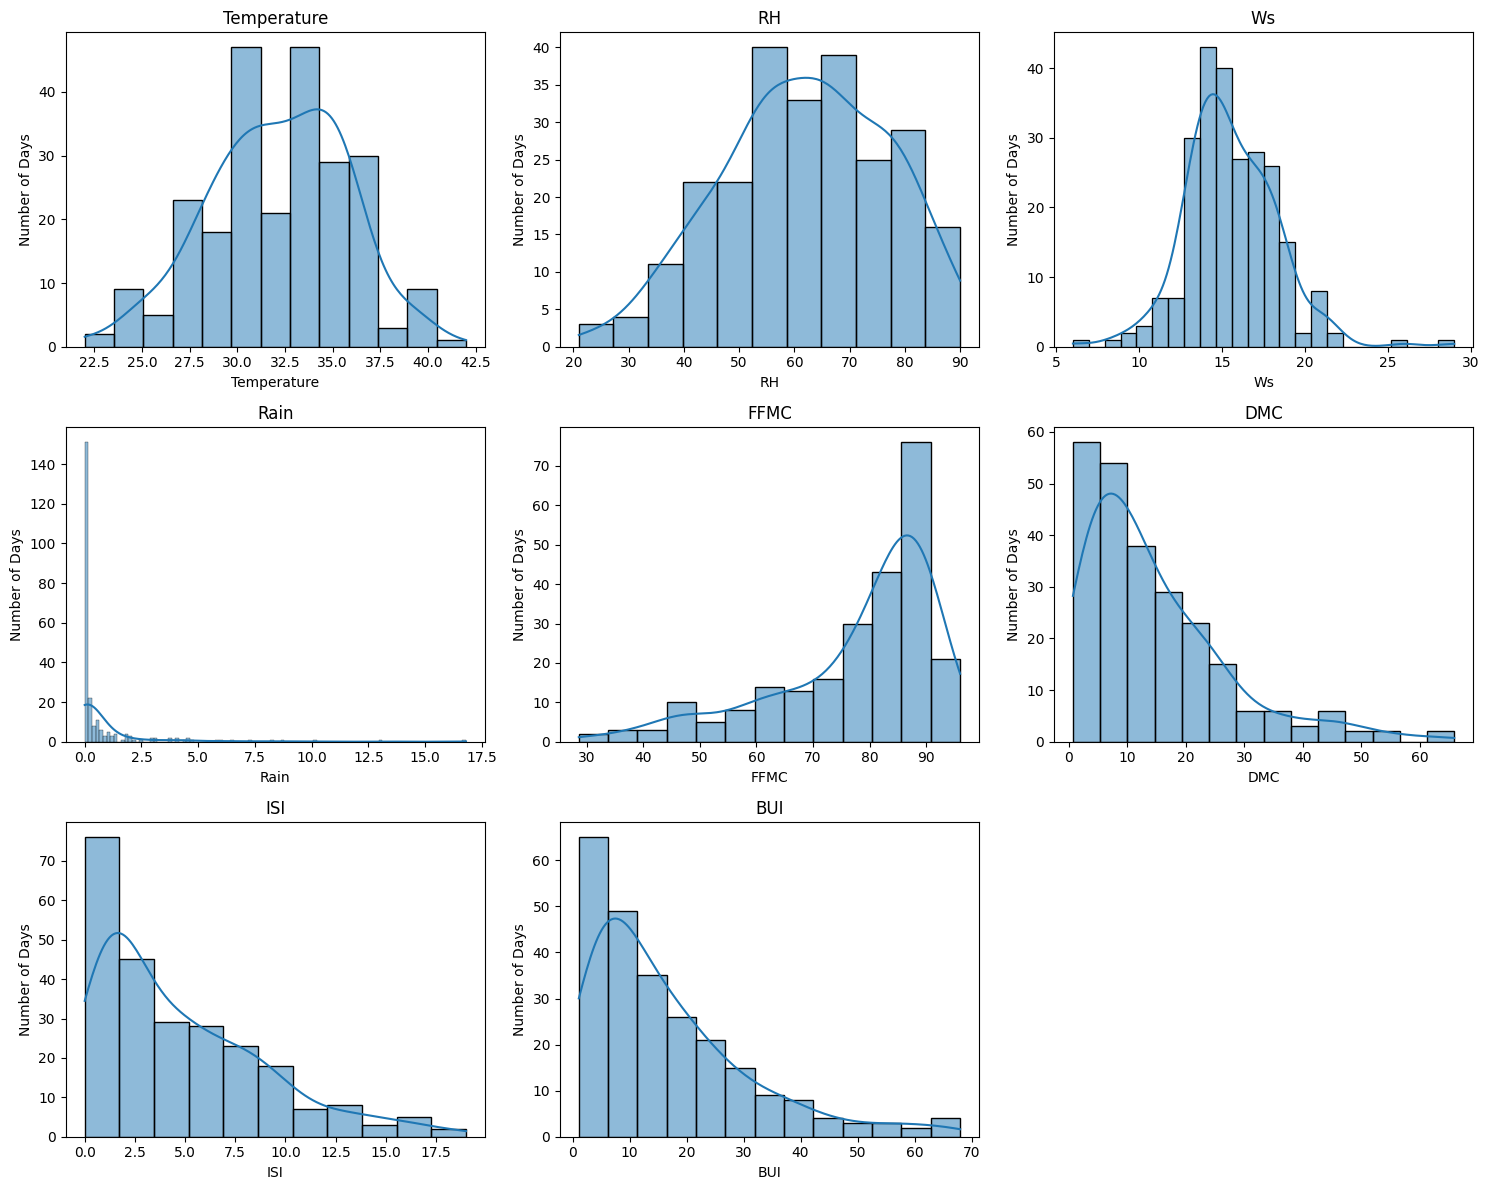

In [ ]:
#Histogram 
important_cols = [
    'Temperature', 'RH', 'Ws', 'Rain',
    'FFMC', 'DMC', 'ISI', 'BUI', 
]

rows = 3
cols = 3

plt.figure(figsize=(15, 12))

for i, col in enumerate(important_cols):
    plt.subplot(rows, cols, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Number of Days")

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19864\2688699679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Region", y="Temperature", data=df, palette="Set2")


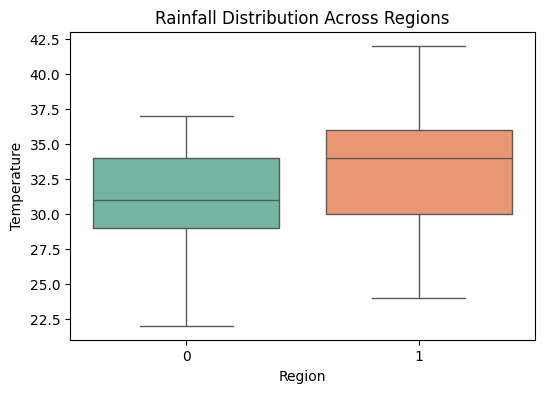

In [ ]:
#Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x="Region", y="Temperature", data=df, palette="Set2")
plt.title("Rainfall Distribution Across Regions")
plt.xlabel("Region")
plt.ylabel("Temperature")
plt.show()


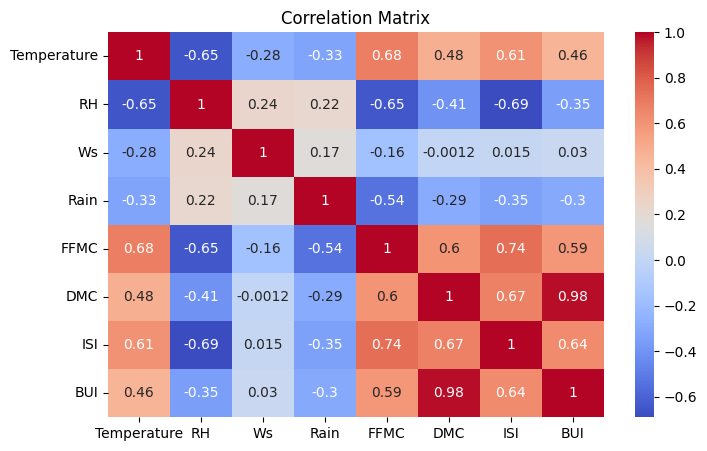

In [ ]:
#Heatmap
corr_matrix = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI']].corr()
plt.figure(figsize=(8, 5))
plt.yticks(rotation=90)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [24]:
df = df.drop('Classes', axis=1)

In [ ]:
#Saving Cleaned dataset
df.to_csv("FWI_Dataset_Cleaned.csv", index=False)
